<h1 style="font-size: 40px;"><center>Likelihood of subscribing to a game related newsletter - a Knn classification model 
</center></h1>

<p style="font-size: 25px;">Project by DSCI 100 Group 45</p>

<h1><center><u>Introduction</u></center></h1>

<h3>Background Information</h3>

<p style="font-size: 18px;">A research group called The Pacific Laboratory of Artificial Intelligence at UBC, run by Frank Wood, is collecting data about how people play video games. They set up a Minecraft Server that people online can engage with, and the site collects data from their games. The collected data includes the player's gameplay, speech, and key presses and asks for the player's personal information such as email/phone number, age, gender, and experience level. The server also records the duration of the player's games. </p>

<h3>Our Research Question</h3>

<p style="font-size: 22px;"><i>Can age, and number of hours spent playing Minecraft predict if a player will subscribe to a game-related newsletter in the players dataset?</i></p>

<p style="font-size: 18px;">Our Exploratory Data Analysis revealed that players with higher played_hours and players within a certain age range tend to subscribe more suggesting that they may be strong predictors, which is why they are included in our question. We are not including the experience variable as a predictor because based on preliminary analysis, there was no correlation between experience level and subscription status. Additionally, we are not including the gender variable as a predictor as it is a categorical value with no inherent ranking so to assign it a numeric value, we may create an order that could introduce bias and it would increase the complexity of our model. </p>

<p style="font-size: 18px;"> The goal of this project is to predict whether a Minecraft player will subscribe to a game-related newsletter. Since the outcome must either be "yes" or "no", it is a classification problem.
This project involves answering the clearly defined question using the players dataset. The report will provide background context, describe the dataset, outline the analytical methods used, and present results through summaries, visualizations, and formal data analysis, including interpreting the findings, and discussing their implications.</p>


<h3>Players Dataset Description</h3>

<p style="font-size: 18px;">- The dataframe has 196 observations and 7 variables</p>

| Variable | Type   | Missing Values | Description   | Potential Issues    |
|----------|--------|----------------|---------------|---------------------|
| experience| Character (categorical)| 0 | Player's self-reported experience level:<br>Pro, Veteran, Amateur, Beginner, or Regular | Experience level does not seem to correlate with subscription status. |
| subscribe| Logical (categorical)  | 0 | Indicates whether the player has an active subscription: True or False  | There is a class imbalance in the subscribe variable. |
| hashedEmail| Character (categorical)| 0 | Anonymized, unique identifier for each player’s email address | The variable names and hashedEmails will not help in the analysis of data. |
| played_hours | Double (numerical) | 0 | Total cumulative hours the player has played to one decimal place| Many users logged very little hours played on the game, causing significant outliers.<br>Does played_hours correspond to hours played in lifetime or hours played in a single game/sitting? |
| name | Character (categorical)| 0 | The player's first name | N/A |
| gender | Character (categorical)| 0 | The player's self-reported gender:<br>Male, Female, Agender, Nonbinary, Two-spirited, Prefer not to say, or Other | Variables like Age, gender, and experience are self-reported and may be inaccurate.<br>If K-NN classification with the gender variable is used, variable type needs to be converted.  |
| Age| Double (numerical)| 2 | The player's age in years | There are 2 missing values in the Age column<br>Extreme outliers, some players have values near zero. |


<h1><center><u>Methods and Results</u></center></h1>

<h3>Reading in the Data</h3>

In [7]:
library(tidyverse)

In [8]:
players_raw <- read.csv("https://raw.githubusercontent.com/bhallasaachi/dsci-100-2025w1-Saachi-group-45/refs/heads/main/players.csv")
players_initial <- players_raw|>
head(10)
players_initial

,experience,subscribe,hashedEmail,played_hours,name,gender,Age
,<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<int>
1,Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
2,Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
3,Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
4,Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
5,Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
6,Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
7,Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
8,Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
9,Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


<h3>Summary Stats</h3>

In [9]:
players_mean <- players_raw |>
    select(Age, played_hours)|>
    map(mean, na.rm = TRUE)
    players_mean

subscribe_percentage <- nrow(players_raw)
players_raw |>
  group_by(subscribe) |>
  summarize(count = n())

$Age
[1] 21.13918

$played_hours
[1] 5.845918

subscribe,count
<lgl>,<int>
FALSE,52
TRUE,144


<h3>Wrangling the Data for Analysis</h3>

In [25]:
players <- players_raw |>
    select(subscribe, played_hours, Age, gender) |>
    mutate(
        subscribe = as_factor(subscribe),
        gender = as_factor(gender))

glimpse(players)

Rows: 196
Columns: 4
$ subscribe    <fct> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ Age          <int> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…
$ gender       <fct> Male, Male, Male, Female, Male, Female, Female, Male, Mal…


<h3>Visualizations</h3>

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


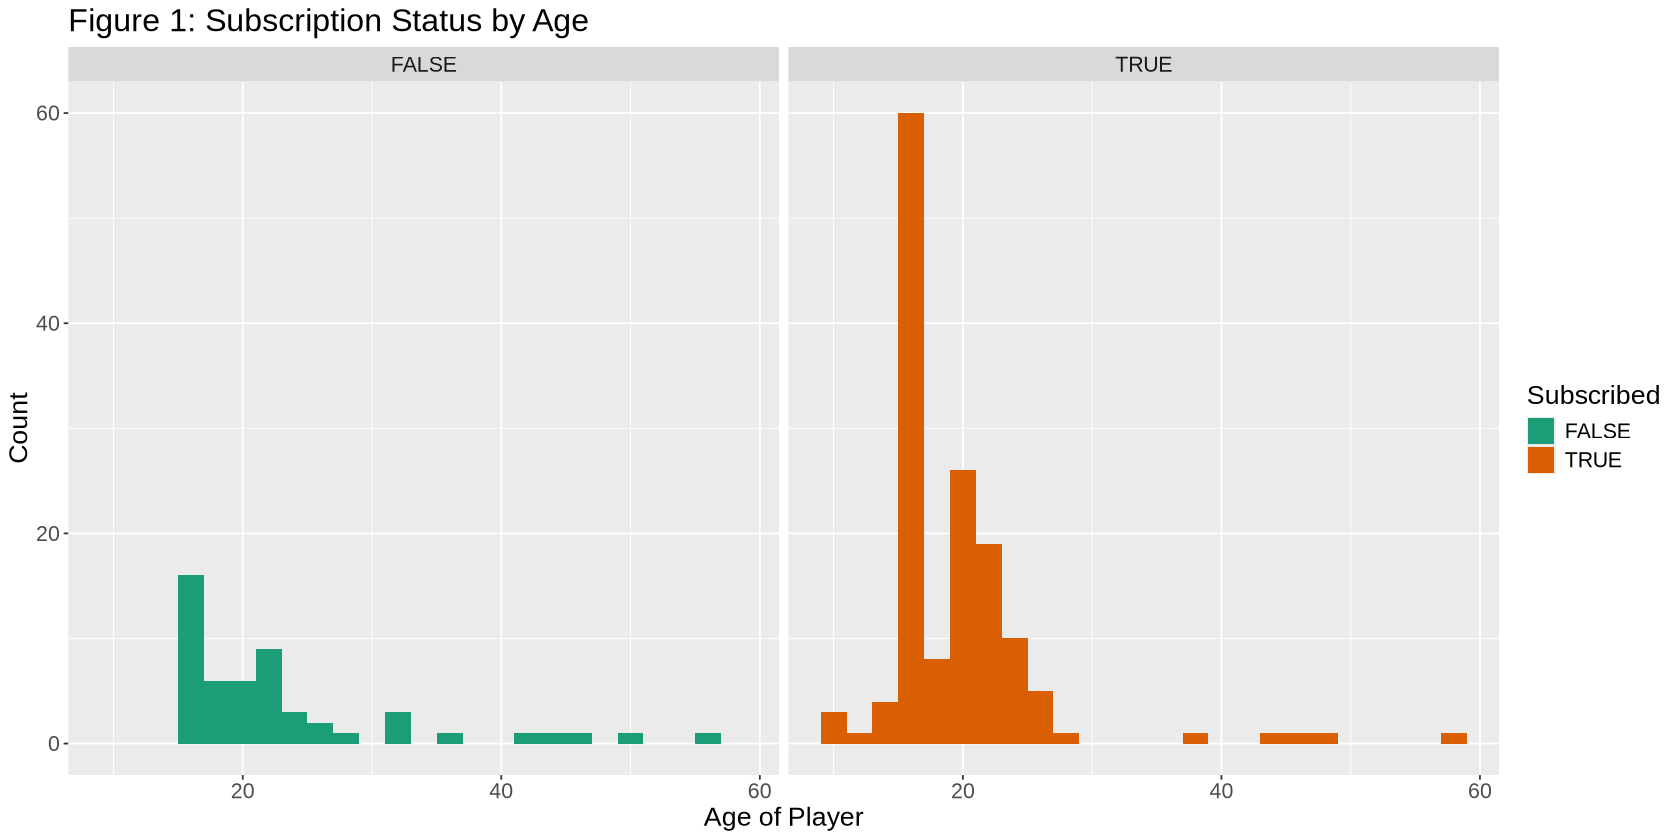

In [26]:
options(repr.plot.width = 14, repr.plot.height = 7)

age_plot <- players_raw |>
ggplot(aes(x = Age, fill = subscribe)) +
geom_histogram(binwidth = 2) +
facet_wrap(~subscribe) +
scale_fill_brewer(palette = "Dark2") +
labs(title = "Figure 1: Subscription Status by Age",
     x = "Age of Player",
     y = "Count",
     fill = "Subscribed") +
theme(text = element_text(size = 16))

age_plot

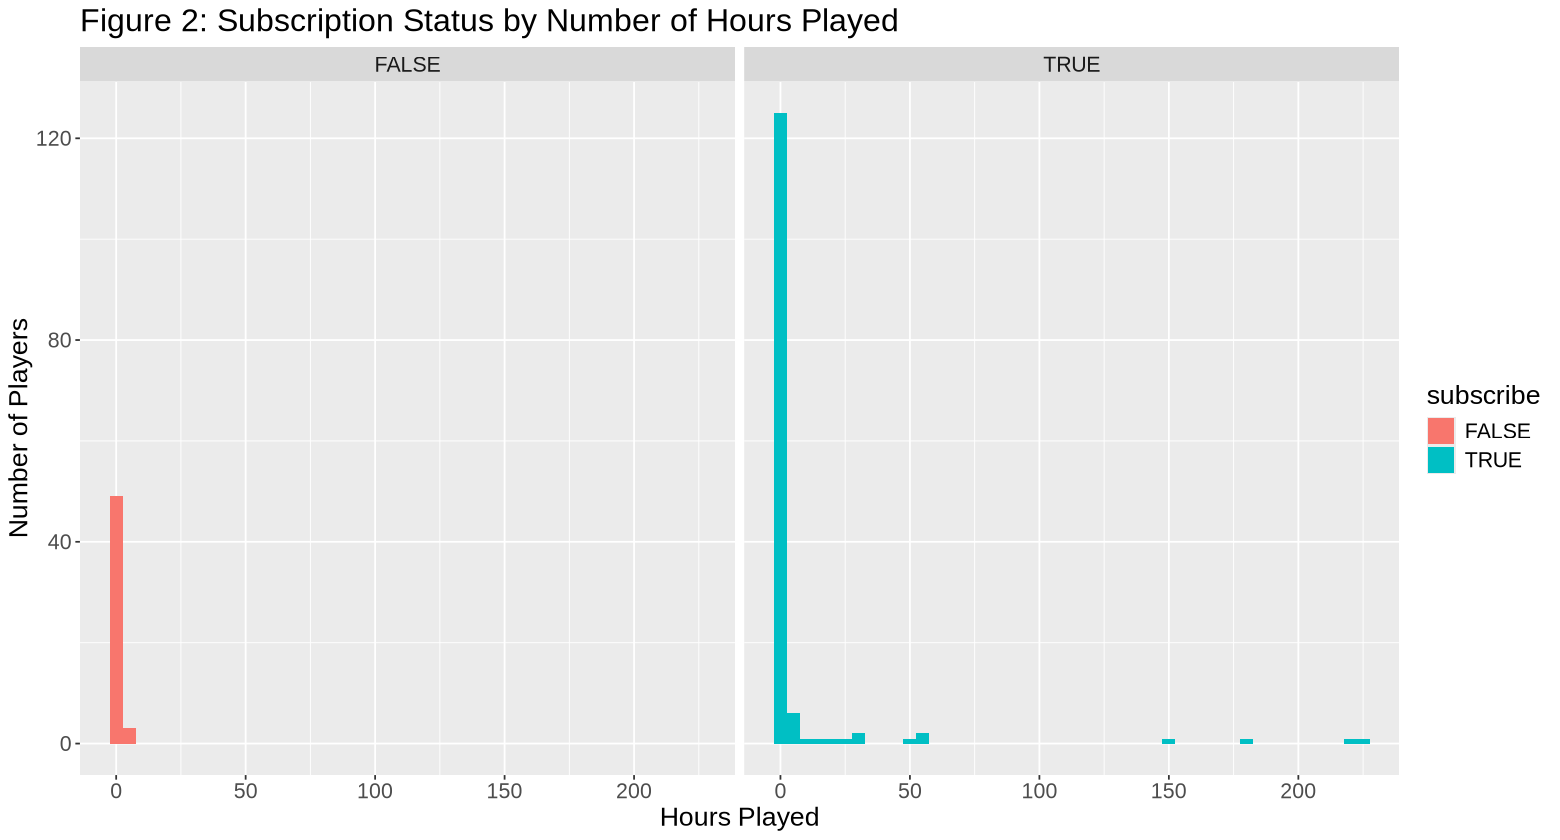

In [27]:
options(repr.plot.height = 7, repr.plot.width = 13)

hours_played_plot <- players_raw |>
ggplot(aes(x = played_hours, fill = subscribe)) +
geom_histogram(binwidth = 5) +
facet_wrap(~subscribe) +
labs(x = "Hours Played",
     y = "Number of Players",
     title = "Figure 2: Subscription Status by Number of Hours Played") +
theme(text = element_text(size = 16))

hours_played_plot

<h3> Method Description</h3>

<p style="font-size: 18px;"> We will use <b>k-nn classification</b> to answer the predictive question on the players.csv dataset. This method was chosen because we will predict a categorical class (subscribed vs not subscribed) based on 2 observations: age and played_hours. Given our small number of predictors and strong dataset size, K-NN is computationally feasible, and requires few assumptions about the underlying data distribution. </p>

<p style="font-size: 18px;">  For this method, it is assumed that the data reported is accurate such as the self-reported experience level for each player. Since distance is calculated using the variables, an unstandardized analysis of this data would make the played_hours variable dominate the distance calculation. Thus, we <b>must</b> normalize/scale all quantitative features to a similar range. We must also perform mean imputation to account for N/A entries for the predictor variables. </p>

<ol style="font-size: 18px;">We will use the following steps in our analysis: <br> <br>
<li>Use the K-nearest neighbours algorithm included in tidymodels</li>
<li>Select the columns needed (age, played_hours, subscribe)</li>
<li>Set the seed for reproducibility </li>
<li>Split data into training and testing set with 80% in training set and 20% in testing set </li>
<li>Center and scale the data</li>
<li>Split the training set into a training set and a validation set using 10-fold cross-validation (arbitrarily chosen)</li>
<li>Tune the classifier to find the best value of K that gives us the highest accuracy and fit the model using the training data.</li>
<li>Use that value of K in a workflow with predictor values of age and played_hours to predict the class of subscribers on the test set. </li>
<li>Evaluate the accuracy, precision, and recall of the model using confusion matrices.</li> </ol>


<h3>K-nn Classification Model</h3>

In [28]:
library(themis)
library(tidymodels)

set.seed(1)


<h4>Splitting The Data </h4>

In [29]:
players_split <- initial_split(players, prop = 0.8, strata = subscribe)
players_train <- training(players_split)
players_test <- testing(players_split)

nrow(players_train)
nrow(players_test)

[1] 156

[1] 40

<h4> Recipe, Spec, and Workflow </h4>

In [30]:
players_recipe <- recipe(subscribe ~ ., data = players_train) |>
    step_impute_mean(all_numeric_predictors()) |> # n/a age values
    step_dummy(all_nominal_predictors(), -all_outcomes()) |> # gender/experience -> numbers
    step_scale(all_predictors()) |>
    step_center(all_predictors())# |>
    #step_upsample(subscribe, over_ratio = 1, skip = FALSE) # UNCOMMENT FOR UPSAMPLING

knn_spec <- nearest_neighbor(neighbors = tune(), weight_func = "rectangular") |>
    set_engine("kknn") |>
    set_mode("classification")

knn_workflow <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(knn_spec)

<h4>Cross-Validation </h4>

In [31]:
players_vfold <- vfold_cv(players_train, v = 8, strata = subscribe) 

k_grid <- tibble(neighbors = seq(1, 30, by = 1))

knn_tune_results <- knn_workflow |>
    tune_grid(resamples = players_vfold, grid = k_grid) |>
    collect_metrics()

accuracies <- knn_tune_results |> 
    filter(.metric == "accuracy") |>
    head(10)

accuracies

→ A | warning: !  The following column has zero variance so scaling cannot be used:
                 gender_Agender.
               ℹ Consider using ?step_zv (`?recipes::step_zv()`) to remove those columns
                 before normalizing.

There were issues with some computations   A: x1

→ B | warning: !  The following column has zero variance so scaling cannot be used:
                 gender_Other.
               ℹ Consider using ?step_zv (`?recipes::step_zv()`) to remove those columns
                 before normalizing.

There were issues with some computations   A: x1
There were issues with some computations   A: x1   B: x1

There were issues with some computations   A: x1   B: x1





neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.4476817,8,0.04207859,Preprocessor1_Model01
2,accuracy,binary,0.4602130,8,0.04618827,Preprocessor1_Model02
3,accuracy,binary,0.6211310,8,0.04252256,Preprocessor1_Model03
4,accuracy,binary,0.6361999,8,0.03669653,Preprocessor1_Model04
5,accuracy,binary,0.6675125,8,0.02931891,Preprocessor1_Model05
6,accuracy,binary,0.6725094,8,0.03020476,Preprocessor1_Model06
7,accuracy,binary,0.7104010,8,0.01843171,Preprocessor1_Model07
8,accuracy,binary,0.7104010,8,0.01843171,Preprocessor1_Model08
9,accuracy,binary,0.7426378,8,0.02102326,Preprocessor1_Model09


<h4> Graphing K via Cross-Validation </h4>

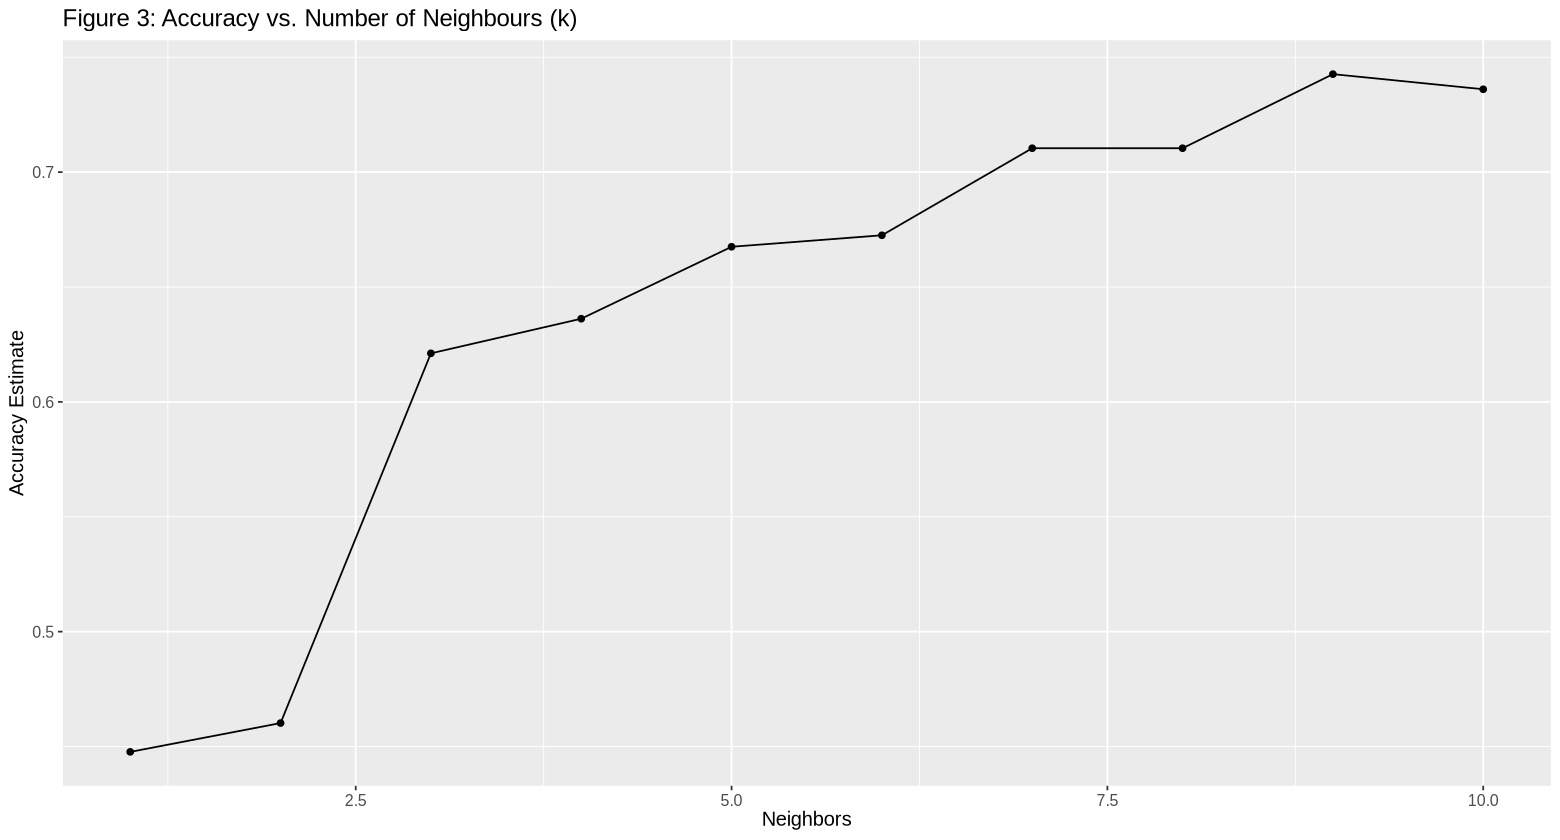

In [32]:
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate", title = "Figure 3: Accuracy vs. Number of Neighbours (k)") +
    theme(text = element_text(size = 12))

accuracy_vs_k

<h4> Picking the best K </h4>

In [33]:
best_k <- accuracies |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)

best_k

[1] 9

<h4> Tuning and Fitting the Model </h4>

In [34]:
players_spec_tuned <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
  set_engine("kknn") |>
  set_mode("classification")

players_fit <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(players_spec_tuned) |>
  fit(data = players_train)

players_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
4 Recipe Steps

• step_impute_mean()
• step_dummy()
• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(9,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2371795
Best kernel: rectangular
Best k: 9

<h4>Model Accuracy, Precision, and Recall </h4>

In [35]:
players_predictions <- predict(players_fit, players_test) |>
    bind_cols(players_test)

print("Model Levels:")
players_predictions |> pull(subscribe) |> levels()

print("Model Accuracy:")
players_predictions |>
    metrics(truth = subscribe, estimate = .pred_class) |>
    filter(.metric == "accuracy")

print("Model Precision:")
players_predictions |>
    precision(truth = subscribe, estimate = .pred_class, event_level = "second")

print("Model Recall:")
players_predictions |>
    recall(truth = subscribe, estimate = .pred_class, event_level = "second")

[1] "Model Levels:"


[1] "FALSE" "TRUE"

[1] "Model Accuracy:"


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.725


[1] "Model Precision:"


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.75


[1] "Model Recall:"


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.9310345


<h4> Confusion Matrix </h4>

In [36]:
confusion <- players_predictions |>
        conf_mat(truth = subscribe, estimate = .pred_class)

confusion

          Truth
Prediction FALSE TRUE
     FALSE     2    2
     TRUE      9   27

<h4> Majority Classifier</h4>

In [37]:
player_proportions <- players_train |>
    group_by(subscribe) |>
    summarize(n = n()) |>
    mutate(percent = 100*n/nrow(players_train))
player_proportions

subscribe,n,percent
<fct>,<int>,<dbl>
FALSE,41,26.28205
TRUE,115,73.71795


<h1><center><u>Discussion</u></center></h1>

<h1><center><u>References</u></center></h1>

(https://www.freecodecamp.org/news/how-to-change-text-size-in-html/)